# Fechas

Establecemos el directorio de trabajo

In [47]:
import os
os.chdir(r"C:\americo\ia_dema\02_Fechas\00_Teoría")

Importamos las librerias necesarias

In [48]:
import pandas as pd
import numpy as np

# Cargamos los datos

In [49]:
df2=pd.read_csv("Ejemplo_1.csv", sep=",", encoding='latin-1')

Sacamos un breve resumen estadistico de las variables

In [50]:
df2.describe(include = 'all')

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
count,65533,64907.000000,65314.000000,63110.000000,63095.000000,62947.000000,63372.000000,55499.000000,63604.000000,56759.000000
unique,65533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01/01/1998 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.488275,200.027100,178.798558,49.129757,7.122150,34.381856,4.754911,1.463840,21.695343
std,NaN,2.398349,94.457268,121.515278,22.638220,7.539047,20.467023,3.648367,1.120033,12.637921
min,NaN,-0.240000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-2.167474,-0.033333,-1.000000
25%,NaN,2.600000,140.000000,82.000000,33.000000,2.000000,22.000000,2.103333,0.634583,13.000000
50%,NaN,4.100000,210.000000,153.000000,46.000000,4.000000,31.000000,4.000000,1.140000,20.000000
75%,NaN,5.760000,270.000000,249.000000,61.000000,10.000000,44.000000,6.500000,1.980000,28.000000


Podriamos cambiar el nombre de las variables

In [51]:
df2 = df2.rename(columns={'ws': 'Wind_Speed'})
df2

,date,Wind_Speed,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.372500,NaN
1,01/01/1998 01:00,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN
2,01/01/1998 02:00,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.602500,NaN
3,01/01/1998 03:00,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.217500,NaN
4,01/01/1998 04:00,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.912500,NaN
...,...,...,...,...,...,...,...,...,...,...
65528,23/06/2005 08:00,1.50,260.0,388.0,145.0,6.0,48.0,NaN,1.637931,26.0
65529,23/06/2005 09:00,1.50,210.0,404.0,168.0,7.0,58.0,NaN,1.293103,34.0
65530,23/06/2005 10:00,2.60,240.0,387.0,175.0,10.0,55.0,NaN,1.293103,34.0
65531,23/06/2005 11:00,3.10,220.0,312.0,125.0,15.0,52.0,NaN,1.293103,33.0


Analizamos las clases/tipos de las variables

In [52]:
df2.dtypes

date           object
Wind_Speed    float64
wd            float64
nox           float64
no2           float64
o3            float64
pm10          float64
so2           float64
co            float64
pm25          float64
dtype: object

# Parseado de fechas

La variable 'date' se ha clasificado como object, por lo que habrá que darle formato fecha para poder realizar cualquier cálculo con esa variable.

### creamos un campo llamado fecha que sera igual al campo original date

In [53]:
df2['fecha'] = pd.to_datetime(df2['date'], format='%d/%m/%Y %H:%M')

Comprobamos el cambio

In [54]:
df2.dtypes

date                  object
Wind_Speed           float64
wd                   float64
nox                  float64
no2                  float64
o3                   float64
pm10                 float64
so2                  float64
co                   float64
pm25                 float64
fecha         datetime64[ns]
dtype: object

Ahora ya podriamos hacer calculos con la fechas. Por ejemplo, la frecuencia de medida...

In [55]:
df2['fecha'][1] - df2['fecha'][0]

Timedelta('0 days 01:00:00')

...o el rango temporal de los datos

In [56]:
df2.index

RangeIndex(start=0, stop=65533, step=1)

In [57]:
df2.loc[65532, 'fecha'] - df2.loc[0,'fecha']
#        fila, campo              fila, campo 

Timedelta('2730 days 12:00:00')

# Funciones específicas relacionadas con las fechas y horas.

In [58]:
from datetime import datetime, date, time, timedelta
import calendar

In [59]:
ahora = datetime.now()
ahora

datetime.datetime(2025, 6, 24, 9, 0, 38, 552881)

In [60]:
datetime.now().day

24

In [61]:
datetime.now().month

6

In [62]:
datetime.now().hour

9

In [63]:
datetime.now().year

2025

# Descomponer la fecha

Hacemos una copia del DataFrame para no modificar el original. Nos quedamos con las 500 primeras filas para que no tarde tanto.

In [64]:
df3=df2.copy().head(500)

Creamos la nuevas variables / columnas

In [65]:
df3['Año']=''
df3['Mes']=''
df3['Dia']=''
df3['Hora']=''
df3['Min']=''
df3['Seg']=''
df3['DiaSemana']=''

In [66]:
df3.head()

,date,Wind_Speed,wd,nox,no2,o3,pm10,so2,co,pm25,fecha,Año,Mes,Dia,Hora,Min,Seg,DiaSemana
0,01/01/1998 00:00,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.3725,NaN,1998-01-01 00:00:00,,,,,,,
1,01/01/1998 01:00,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN,1998-01-01 01:00:00,,,,,,,
2,01/01/1998 02:00,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.6025,NaN,1998-01-01 02:00:00,,,,,,,
3,01/01/1998 03:00,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.2175,NaN,1998-01-01 03:00:00,,,,,,,
4,01/01/1998 04:00,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.9125,NaN,1998-01-01 04:00:00,,,,,,,


Descomponemos la variable 'fecha'

Vamos a probar a ejecutar el cambio con un bucle for. Vamos a ver como tarda mucho tiempo en ejecutar los cálculos

In [67]:
for i in range(0,len(df3)):
    print(i)
    df3['Año'][i] = df3['fecha'][i].year
    df3['Mes'][i] = df3['fecha'][i].month
    df3['Dia'][i] = df3['fecha'][i].day
    df3['Hora'][i]= df3['fecha'][i].hour
    df3['Min'][i] = df3['fecha'][i].minute
    df3['Seg'][i] = df3['fecha'][i].second
    df3['DiaSemana'][i] = df3['fecha'][i].strftime('%A')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102


C:\Users\Dell\AppData\Local\Temp\ipykernel_14448\1899629885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Año'][i] = df3['fecha'][i].year
C:\Users\Dell\AppData\Local\Temp\ipykernel_14448\1899629885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Mes'][i] = df3['fecha'][i].month
C:\Users\Dell\AppData\Local\Temp\ipykernel_14448\1899629885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Dia'][i] = df3['fecha']

103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352


In [68]:
df3

,date,Wind_Speed,wd,nox,no2,o3,pm10,so2,co,pm25,fecha,Año,Mes,Dia,Hora,Min,Seg,DiaSemana
0,01/01/1998 00:00,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.3725,NaN,1998-01-01 00:00:00,1998,1,1,0,0,0,Thursday
1,01/01/1998 01:00,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN,1998-01-01 01:00:00,1998,1,1,1,0,0,Thursday
2,01/01/1998 02:00,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.6025,NaN,1998-01-01 02:00:00,1998,1,1,2,0,0,Thursday
3,01/01/1998 03:00,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.2175,NaN,1998-01-01 03:00:00,1998,1,1,3,0,0,Thursday
4,01/01/1998 04:00,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.9125,NaN,1998-01-01 04:00:00,1998,1,1,4,0,0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,21/01/1998 15:00,3.60,190.0,490.0,81.0,2.0,55.0,12.3525,4.5025,NaN,1998-01-21 15:00:00,1998,1,21,15,0,0,Wednesday
496,21/01/1998 16:00,3.00,170.0,343.0,68.0,2.0,49.0,11.3125,3.9625,NaN,1998-01-21 16:00:00,1998,1,21,16,0,0,Wednesday
497,21/01/1998 17:00,2.76,160.0,216.0,68.0,1.0,41.0,8.3250,2.9025,NaN,1998-01-21 17:00:00,1998,1,21,17,0,0,Wednesday
498,21/01/1998 18:00,3.60,170.0,241.0,57.0,1.0,41.0,8.0025,3.4200,NaN,1998-01-21 18:00:00,1998,1,21,18,0,0,Wednesday


In [69]:
df3 = df2.copy()

In [70]:
df3['Año']=df3['fecha'].dt.year
df3['Mes']=df3['fecha'].dt.month
df3['Dia']=df3['fecha'].dt.day
df3['Hora']=df3['fecha'].dt.hour
df3['Min']=df3['fecha'].dt.minute
df3['Seg']=df3['fecha'].dt.second
df3['DiaSemana'] = df3['fecha'].dt.strftime('%A')

In [71]:
df3

,date,Wind_Speed,wd,nox,no2,o3,pm10,so2,co,pm25,fecha,Año,Mes,Dia,Hora,Min,Seg,DiaSemana
0,01/01/1998 00:00,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.372500,NaN,1998-01-01 00:00:00,1998,1,1,0,0,0,Thursday
1,01/01/1998 01:00,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN,1998-01-01 01:00:00,1998,1,1,1,0,0,Thursday
2,01/01/1998 02:00,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.602500,NaN,1998-01-01 02:00:00,1998,1,1,2,0,0,Thursday
3,01/01/1998 03:00,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.217500,NaN,1998-01-01 03:00:00,1998,1,1,3,0,0,Thursday
4,01/01/1998 04:00,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.912500,NaN,1998-01-01 04:00:00,1998,1,1,4,0,0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65528,23/06/2005 08:00,1.50,260.0,388.0,145.0,6.0,48.0,NaN,1.637931,26.0,2005-06-23 08:00:00,2005,6,23,8,0,0,Thursday
65529,23/06/2005 09:00,1.50,210.0,404.0,168.0,7.0,58.0,NaN,1.293103,34.0,2005-06-23 09:00:00,2005,6,23,9,0,0,Thursday
65530,23/06/2005 10:00,2.60,240.0,387.0,175.0,10.0,55.0,NaN,1.293103,34.0,2005-06-23 10:00:00,2005,6,23,10,0,0,Thursday
65531,23/06/2005 11:00,3.10,220.0,312.0,125.0,15.0,52.0,NaN,1.293103,33.0,2005-06-23 11:00:00,2005,6,23,11,0,0,Thursday


Ahora ya podriamos eliminar la variable 'date'

In [72]:
df2=df2.drop(columns='date')

In [73]:
df2

,Wind_Speed,wd,nox,no2,o3,pm10,so2,co,pm25,fecha
0,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.372500,NaN,1998-01-01 00:00:00
1,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN,1998-01-01 01:00:00
2,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.602500,NaN,1998-01-01 02:00:00
3,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.217500,NaN,1998-01-01 03:00:00
4,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.912500,NaN,1998-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
65528,1.50,260.0,388.0,145.0,6.0,48.0,NaN,1.637931,26.0,2005-06-23 08:00:00
65529,1.50,210.0,404.0,168.0,7.0,58.0,NaN,1.293103,34.0,2005-06-23 09:00:00
65530,2.60,240.0,387.0,175.0,10.0,55.0,NaN,1.293103,34.0,2005-06-23 10:00:00
65531,3.10,220.0,312.0,125.0,15.0,52.0,NaN,1.293103,33.0,2005-06-23 11:00:00


# Fecha con formato personalizado

# Formatos
* %a	Nombre local abreviado de día de semana
* %A	Nombre local completo de día de semana
* %b	Nombre local abreviado de mes
* %B	Nombre local completo de mes
* %c	Representación local de fecha y hora
* %d	Día de mes
* %H	Hora (horario 24 horas)
* %I	Hora (horario 12 horas)
* %j	Número de día del año
* %m	Mes
* %M	Minuto
* %p	Etiqueta AM o PM
* %S	Segundo
* %U	Nº semana del año. Se considera al Domingo como primer día de semana
* %w	Establece el primer día de semana [0(Domingo),1(Lunes)... 6].
* %W	Nº semana del año (Se considera al Lunes como primer día de semana)
* %x	Fecha local
* %X	Hora local
* %y	Año en formato corto
* %Y	Año en formato largo
* %Z	Nombre de Zona Horaria



Definimos el segundo formato

Definimos el primer formato

In [74]:
formato1 = "%a %b %d %H:%M:%S %Y"

In [76]:
df3["fecha1"] = df3["fecha"].dt.strftime(formato1)


In [79]:
df3

,date,Wind_Speed,wd,nox,no2,o3,pm10,so2,co,pm25,fecha,Año,Mes,Dia,Hora,Min,Seg,DiaSemana,fecha1
0,01/01/1998 00:00,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.372500,NaN,1998-01-01 00:00:00,1998,1,1,0,0,0,Thursday,Thu Jan 01 00:00:00 1998
1,01/01/1998 01:00,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN,1998-01-01 01:00:00,1998,1,1,1,0,0,Thursday,Thu Jan 01 01:00:00 1998
2,01/01/1998 02:00,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.602500,NaN,1998-01-01 02:00:00,1998,1,1,2,0,0,Thursday,Thu Jan 01 02:00:00 1998
3,01/01/1998 03:00,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.217500,NaN,1998-01-01 03:00:00,1998,1,1,3,0,0,Thursday,Thu Jan 01 03:00:00 1998
4,01/01/1998 04:00,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.912500,NaN,1998-01-01 04:00:00,1998,1,1,4,0,0,Thursday,Thu Jan 01 04:00:00 1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65528,23/06/2005 08:00,1.50,260.0,388.0,145.0,6.0,48.0,NaN,1.637931,26.0,2005-06-23 08:00:00,2005,6,23,8,0,0,Thursday,Thu Jun 23 08:00:00 2005
65529,23/06/2005 09:00,1.50,210.0,404.0,168.0,7.0,58.0,NaN,1.293103,34.0,2005-06-23 09:00:00,2005,6,23,9,0,0,Thursday,Thu Jun 23 09:00:00 2005
65530,23/06/2005 10:00,2.60,240.0,387.0,175.0,10.0,55.0,NaN,1.293103,34.0,2005-06-23 10:00:00,2005,6,23,10,0,0,Thursday,Thu Jun 23 10:00:00 2005
65531,23/06/2005 11:00,3.10,220.0,312.0,125.0,15.0,52.0,NaN,1.293103,33.0,2005-06-23 11:00:00,2005,6,23,11,0,0,Thursday,Thu Jun 23 11:00:00 2005


In [80]:
formato2 = "%d-%m-%y %I:%M %p"

In [81]:
df3["fecha2"] = df3["fecha"].dt.strftime(formato2)

In [82]:
df3.head()

,date,Wind_Speed,wd,nox,no2,o3,pm10,so2,co,pm25,fecha,Año,Mes,Dia,Hora,Min,Seg,DiaSemana,fecha1,fecha2
0,01/01/1998 00:00,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.3725,NaN,1998-01-01 00:00:00,1998,1,1,0,0,0,Thursday,Thu Jan 01 00:00:00 1998,01-01-98 12:00 AM
1,01/01/1998 01:00,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN,1998-01-01 01:00:00,1998,1,1,1,0,0,Thursday,Thu Jan 01 01:00:00 1998,01-01-98 01:00 AM
2,01/01/1998 02:00,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.6025,NaN,1998-01-01 02:00:00,1998,1,1,2,0,0,Thursday,Thu Jan 01 02:00:00 1998,01-01-98 02:00 AM
3,01/01/1998 03:00,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.2175,NaN,1998-01-01 03:00:00,1998,1,1,3,0,0,Thursday,Thu Jan 01 03:00:00 1998,01-01-98 03:00 AM
4,01/01/1998 04:00,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.9125,NaN,1998-01-01 04:00:00,1998,1,1,4,0,0,Thursday,Thu Jan 01 04:00:00 1998,01-01-98 04:00 AM


### usaremos calendarios

In [83]:
# Visualizar el calendario de cualquier año
print(calendar.TextCalendar(calendar.MONDAY).formatyear(2024, w=2, l=1, c=1, m=3))

# w	The width between two columns. Default value is 2.
# l	Blank line between two rows. Default value is 1.
# c	Space between two months (Column wise). Default value is 6.	Optional
# m	Number of months in a row. Default value is 3.

                              2024

      January               February               March
Mo Tu We Th Fr Sa Su  Mo Tu We Th Fr Sa Su  Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7            1  2  3  4               1  2  3
 8  9 10 11 12 13 14   5  6  7  8  9 10 11   4  5  6  7  8  9 10
15 16 17 18 19 20 21  12 13 14 15 16 17 18  11 12 13 14 15 16 17
22 23 24 25 26 27 28  19 20 21 22 23 24 25  18 19 20 21 22 23 24
29 30 31              26 27 28 29           25 26 27 28 29 30 31

       April                  May                   June
Mo Tu We Th Fr Sa Su  Mo Tu We Th Fr Sa Su  Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7         1  2  3  4  5                  1  2
 8  9 10 11 12 13 14   6  7  8  9 10 11 12   3  4  5  6  7  8  9
15 16 17 18 19 20 21  13 14 15 16 17 18 19  10 11 12 13 14 15 16
22 23 24 25 26 27 28  20 21 22 23 24 25 26  17 18 19 20 21 22 23
29 30                 27 28 29 30 31        24 25 26 27 28 29 30

        July                 August              September
Mo Tu We 

In [84]:
# Visualizar el calendario de este año
año = date.today().year
mes = date.today().month
calendario_mes = calendar.month(año, mes)
print(calendario_mes)

     June 2025
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30



In [85]:
# Diferencia entre fechas
hoy = date.today()
navidad_futura = date(2024, 12, 25)
faltan = navidad_futura - hoy
print ("Hoy:", hoy)
print ("La navidad del 2024", navidad_futura)
print ("Faltan", faltan.days, "días")

Hoy: 2025-06-24
La navidad del 2024 2024-12-25
Faltan -181 días


In [86]:
# Otra forma de calcular la diferencia entre dos fechas
formato_fecha = "%d-%m-%Y"
fecha_inicial = datetime.strptime("01-10-2013", formato_fecha)
fecha_final = datetime.strptime("25-12-2013", formato_fecha)
diferencia = fecha_final - fecha_inicial
print("Fecha inicial:", fecha_inicial)
print("Fecha final:", fecha_final)
print("Diferencia:", diferencia.days, "días")

Fecha inicial: 2013-10-01 00:00:00
Fecha final: 2013-12-25 00:00:00
Diferencia: 85 días


In [87]:
# Operaciones con fechas y horas
hoy = date.today()
hoy

datetime.date(2025, 6, 24)

In [88]:
ayer = hoy - timedelta(days=1)
ayer

datetime.date(2025, 6, 23)

In [89]:
mañana = hoy + timedelta(days=1)
mañana

datetime.date(2025, 6, 25)

In [90]:
diferencia = mañana - ayer
diferencia

datetime.timedelta(days=2)

In [91]:
hoy_mas_1_millon_segundos = hoy + timedelta(seconds=1000000)
hoy_mas_1_millon_segundos

datetime.date(2025, 7, 5)

In [92]:
ahora = datetime.now()
ahora

datetime.datetime(2025, 6, 24, 9, 4, 40, 948817)

In [93]:
mashoras = timedelta(hours=23)
ahora_mas_23h = ahora + mashoras
ahora_mas_23h

datetime.datetime(2025, 6, 25, 8, 4, 40, 948817)

# Graficos

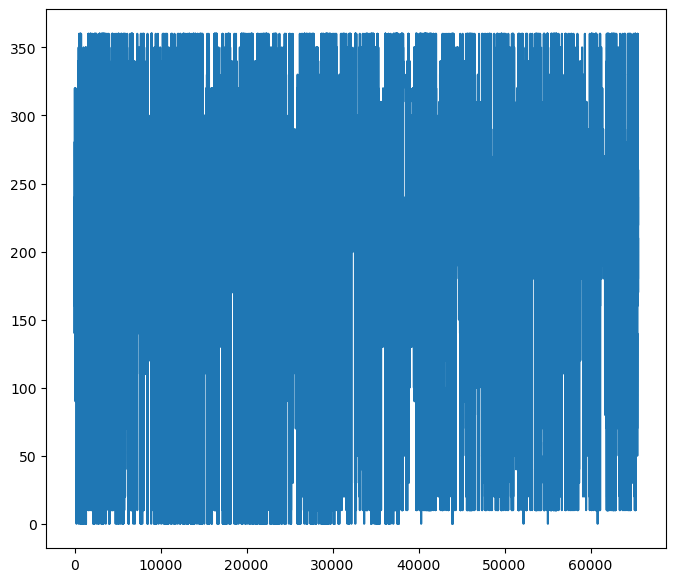

In [94]:
plot = df3['wd'].plot(figsize=(8, 7))

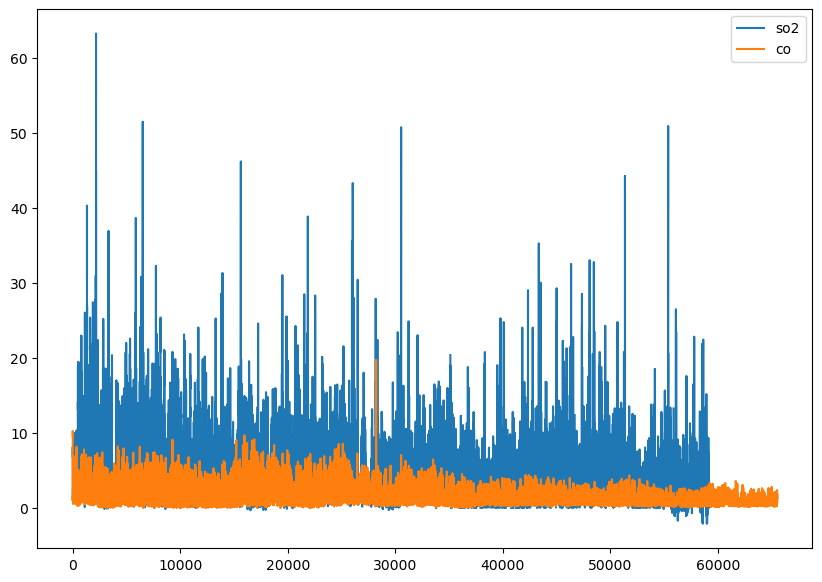

In [95]:
plot = df3[['so2','co']].plot(figsize=(10, 7))

<Axes: xlabel='fecha'>

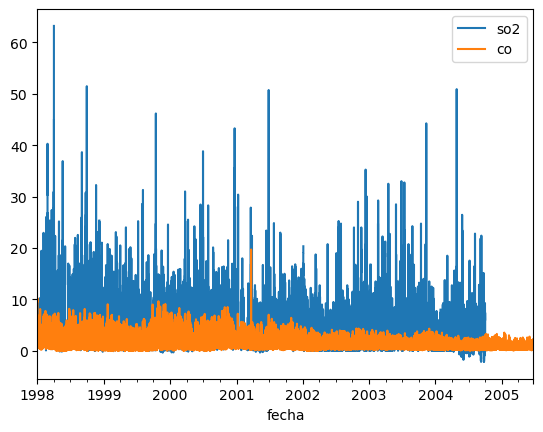

In [96]:
df3.plot.line(x='fecha', y=['so2','co'])

EJERCICIOS DE FECHAS 
1.  Cargar los datos correspondientes a la zona de Piemonte (Italia). 
2.  Obtener un breve resumen estadístico. 
3.  Comprobar la tipología de los datos. 
4.  Transformar la variable ‘Date’ a formato fecha. 
5.  Comprobar que se ha realizado el cambio correctamente. 
6.  Descomponer la fecha en años. 
7.  Crear un nuevo data frame solo con las observaciones del año 2005. 
8.  Descomponer la fecha en meses. 
9.  ¿Cuántas observaciones se han hecho en cada mes? 
10. Cambiar el formato de la fecha a: 
a.  Nombre completo del día de la semana, Nombre completo del mes, Año 
en formato largo y Numero del día del año. 
b.  Nº semana del año, día del mes, año, hora local y nombre de la zona 
horaria. 
11. Calcular los días que faltan para que se termine el curso. 
12. Gráficos: 
a.  Distribución de las precipitaciones 
b.  Distribución de ‘ws’ y ‘precipitaciones 
 